In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
df=pd.read_excel('drive/My Drive/ecom_customer_data.xlsx')
df

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,29997,M,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,29998,M,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,29999,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Display basic information about the dataset
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 30000 non-null  int64 
 1   Gender                  27276 non-null  object
 2   Orders                  30000 non-null  int64 
 3   Jordan                  30000 non-null  int64 
 4   Gatorade                30000 non-null  int64 
 5   Samsung                 30000 non-null  int64 
 6   Asus                    30000 non-null  int64 
 7   Udis                    30000 non-null  int64 
 8   Mondelez International  30000 non-null  int64 
 9   Wrangler                30000 non-null  int64 
 10  Vans                    30000 non-null  int64 
 11  Fila                    30000 non-null  int64 
 12  Brooks                  30000 non-null  int64 
 13  H&M                     30000 non-null  int64 
 14  Dairy Queen             30000 non-null  int64 
 15  Fe

STEP 1: DATA CLEANING

In [ ]:
# Check for missing values
print(df.isnull().sum())
# Fill or drop missing values
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df.dropna(inplace=True)
# Ensure correct data types
print(df.dtypes)

Cust_ID                      0
Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hilfiger               0
Holliste

Step 2: Exploratory Data Analysis (EDA)

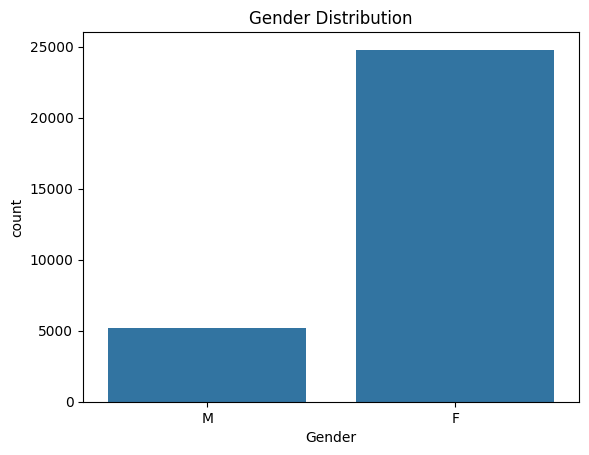

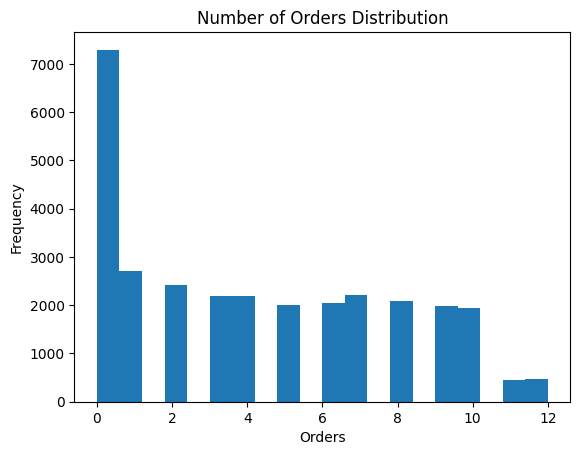

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gender distribution
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

# Number of orders distribution
plt.hist(df['Orders'], bins=20)
plt.title('Number of Orders Distribution')
plt.xlabel('Orders')
plt.ylabel('Frequency')
plt.show()

3.FEATURE ENGINEERING

In [ ]:
import numpy as np
# Calculate total purchase amount
df['TotalPurchase'] = df.iloc[:, 3:].sum(axis=1)
# Frequency is the number of orders
df['Frequency'] = df['Orders']
# Recency: Avoid division by zero and handle infinite values
df['Recency'] = np.where(df['Frequency'] == 0, np.nan, 1 / df['Frequency'])
# Replace infinite or very large values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN values in critical columns for clustering
df.dropna(subset=['TotalPurchase', 'Frequency', 'Recency'], inplace=True)
data_clustering = df[['TotalPurchase', 'Frequency', 'Recency']]
print(data_clustering.head())
print(data_clustering.describe())

   TotalPurchase  Frequency   Recency
0              2          7  0.142857
2              5          7  0.142857
4             16         10  0.100000
5              7          4  0.250000
6              6          6  0.166667
       TotalPurchase     Frequency       Recency
count   22706.000000  22706.000000  22706.000000
mean        7.086717      5.509293      0.309149
std         6.862934      3.106667      0.281423
min         0.000000      1.000000      0.083333
25%         3.000000      3.000000      0.125000
50%         5.000000      5.000000      0.200000
75%         9.000000      8.000000      0.333333
max       160.000000     12.000000      1.000000


4. Clustering:

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# Standardize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_clustering)
# Apply K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(data_scaled)
# Cluster centers
print(kmeans.cluster_centers_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[-0.36508425  0.91869874 -0.65610763]
 [-0.2977732  -0.69657434  0.09633719]
 [ 1.18599616  0.3015698  -0.45508049]
 [-0.12627371 -1.45152101  2.45489955]
 [ 4.09903109 -0.15643855  0.09053177]]


5. VISUALIZATION

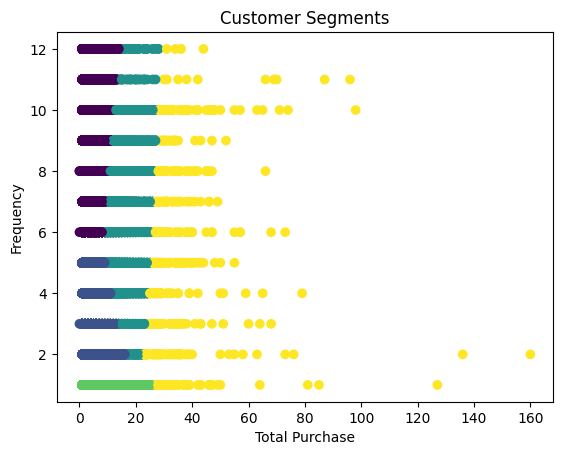

In [ ]:
# Visualize clusters
plt.scatter(df['TotalPurchase'], df['Frequency'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Total Purchase')
plt.ylabel('Frequency')
plt.title('Customer Segments')
plt.show()

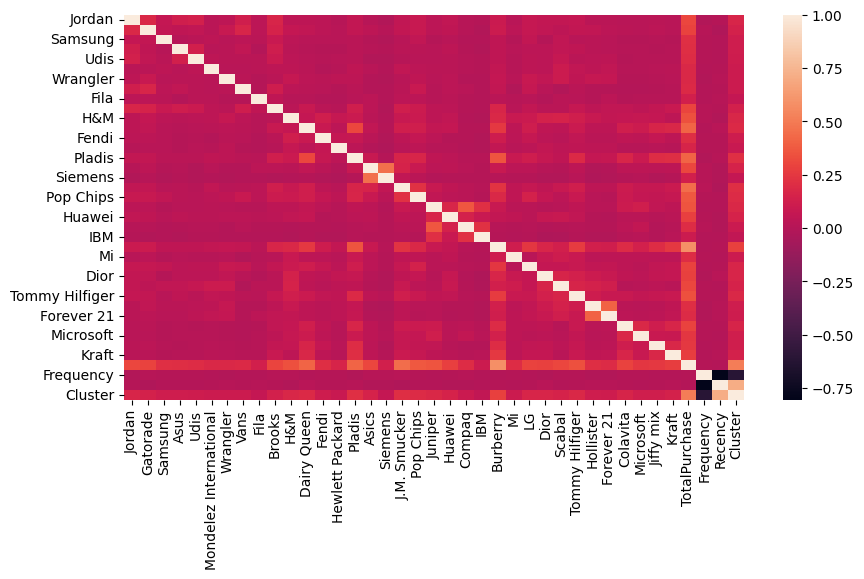

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df.iloc[:,3:].corr())
plt.show()

   Cluster  TotalPurchase  Frequency   Recency
0        0       4.581223   8.363321  0.124509
1        1       5.043165   3.345316  0.336260
2        2      15.225951   6.446149  0.181082
3        3       6.220128   1.000000  1.000000
4        4      35.217476   5.023301  0.334626


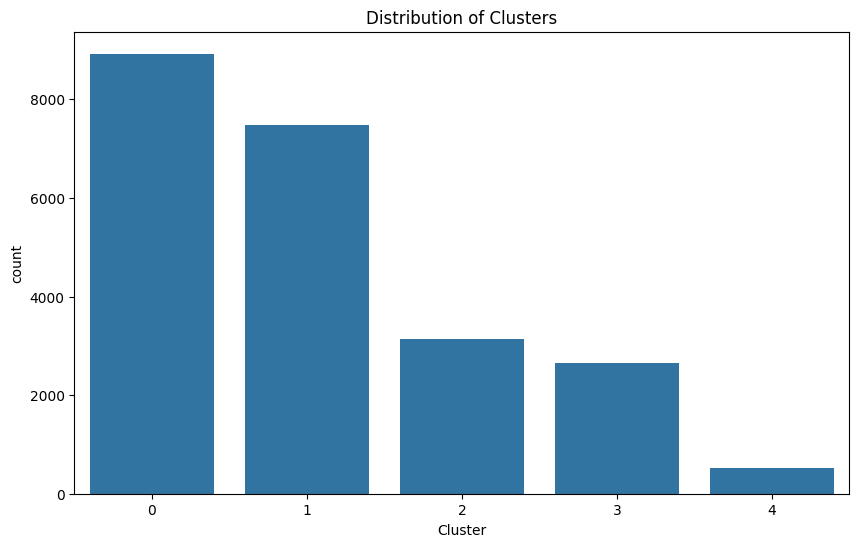

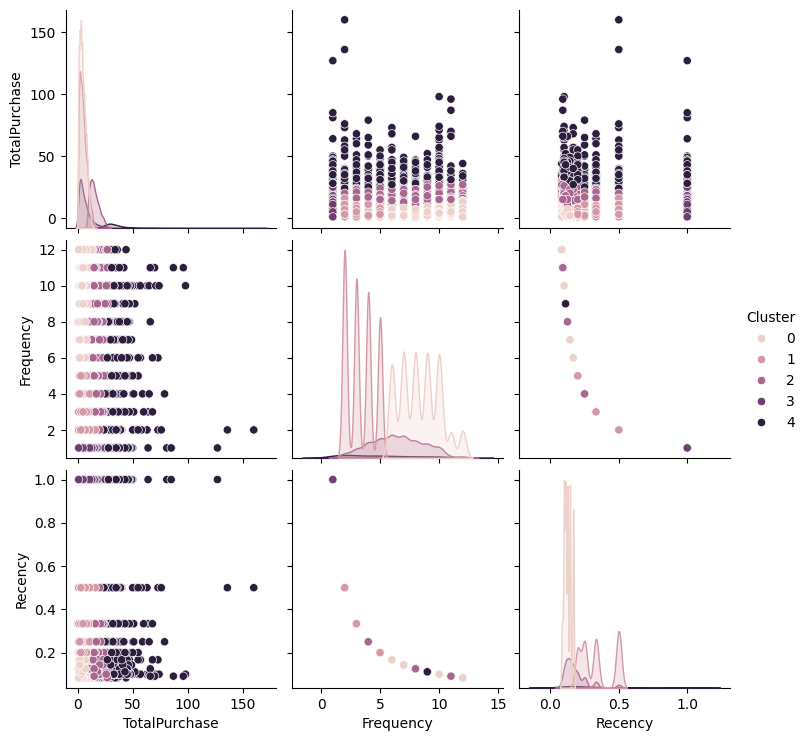

In [ ]:
# Cluster Summary
cluster_summary = df.groupby('Cluster').agg({
    'TotalPurchase': 'mean',
    'Frequency': 'mean',
    'Recency': 'mean'
}).reset_index()

print(cluster_summary)
# Visualization
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', data=df)
plt.title('Distribution of Clusters')
plt.show()

sns.pairplot(df, hue='Cluster', vars=['TotalPurchase', 'Frequency', 'Recency'])
plt.show()

6.REPORT GENERATION

In [ ]:
# Report Generation
report = ""

for cluster_id in cluster_summary['Cluster']:
    report += f"Cluster {cluster_id}\n"
    report += "="*20 + "\n"
    cluster_data = cluster_summary[cluster_summary['Cluster'] == cluster_id]

    report += f"Total Purchase: {cluster_data['TotalPurchase'].values[0]:.2f}\n"
    report += f"Frequency: {cluster_data['Frequency'].values[0]:.2f}\n"
    report += f"Recency: {cluster_data['Recency'].values[0]:.2f}\n"
    report += "\n"

    # Recommendations based on cluster characteristics
    if cluster_data['TotalPurchase'].values[0] > df['TotalPurchase'].mean():
        report += "Recommendations:\n"
        report += "- Focus on high-value products and premium offerings.\n"
        report += "- Provide exclusive deals and loyalty rewards.\n"
    else:
        report += "Recommendations:\n"
        report += "- Target with discounts and promotional offers.\n"
        report += "- Focus on cross-selling and up-selling opportunities.\n"

    report += "\n\n"

print(report)

# Save the report to a text file
with open('customer_segmentation_report.txt', 'w') as file:
    file.write(report)

Cluster 0
Total Purchase: 4.58
Frequency: 8.36
Recency: 0.12

Recommendations:
- Target with discounts and promotional offers.
- Focus on cross-selling and up-selling opportunities.


Cluster 1
Total Purchase: 5.04
Frequency: 3.35
Recency: 0.34

Recommendations:
- Target with discounts and promotional offers.
- Focus on cross-selling and up-selling opportunities.


Cluster 2
Total Purchase: 15.23
Frequency: 6.45
Recency: 0.18

Recommendations:
- Focus on high-value products and premium offerings.
- Provide exclusive deals and loyalty rewards.


Cluster 3
Total Purchase: 6.22
Frequency: 1.00
Recency: 1.00

Recommendations:
- Target with discounts and promotional offers.
- Focus on cross-selling and up-selling opportunities.


Cluster 4
Total Purchase: 35.22
Frequency: 5.02
Recency: 0.33

Recommendations:
- Focus on high-value products and premium offerings.
- Provide exclusive deals and loyalty rewards.



